# Plot the daily spectrograms of a geophone station

In [1]:
from os.path import join
from pandas import Timestamp

from utils_basic import SPECTROGRAM_DIR as indir
from utils_spec import read_hydro_spectrograms
from utils_plot import plot_long_term_hydro_stft_spectrograms, save_figure

In [2]:
station = "A00"
day = "20200113"
window_length = 60.0
overlap = 0.0
downsample_factor = 60

dbmin = -90.0
dbmax = -50.0

marker = True

starttime_marker = Timestamp("2020-01-13T20:00:00")
endtime_marker = Timestamp("2020-01-13T21:00:00")

indir = join(indir, "daily")

In [3]:
filename = f"daily_hydro_spectrograms_{day}_{station}_window{window_length:.0f}s_overlap{overlap:.1f}_downsample{downsample_factor:d}.h5"
inpath = join(indir, filename)
stream_spec = read_hydro_spectrograms(inpath)

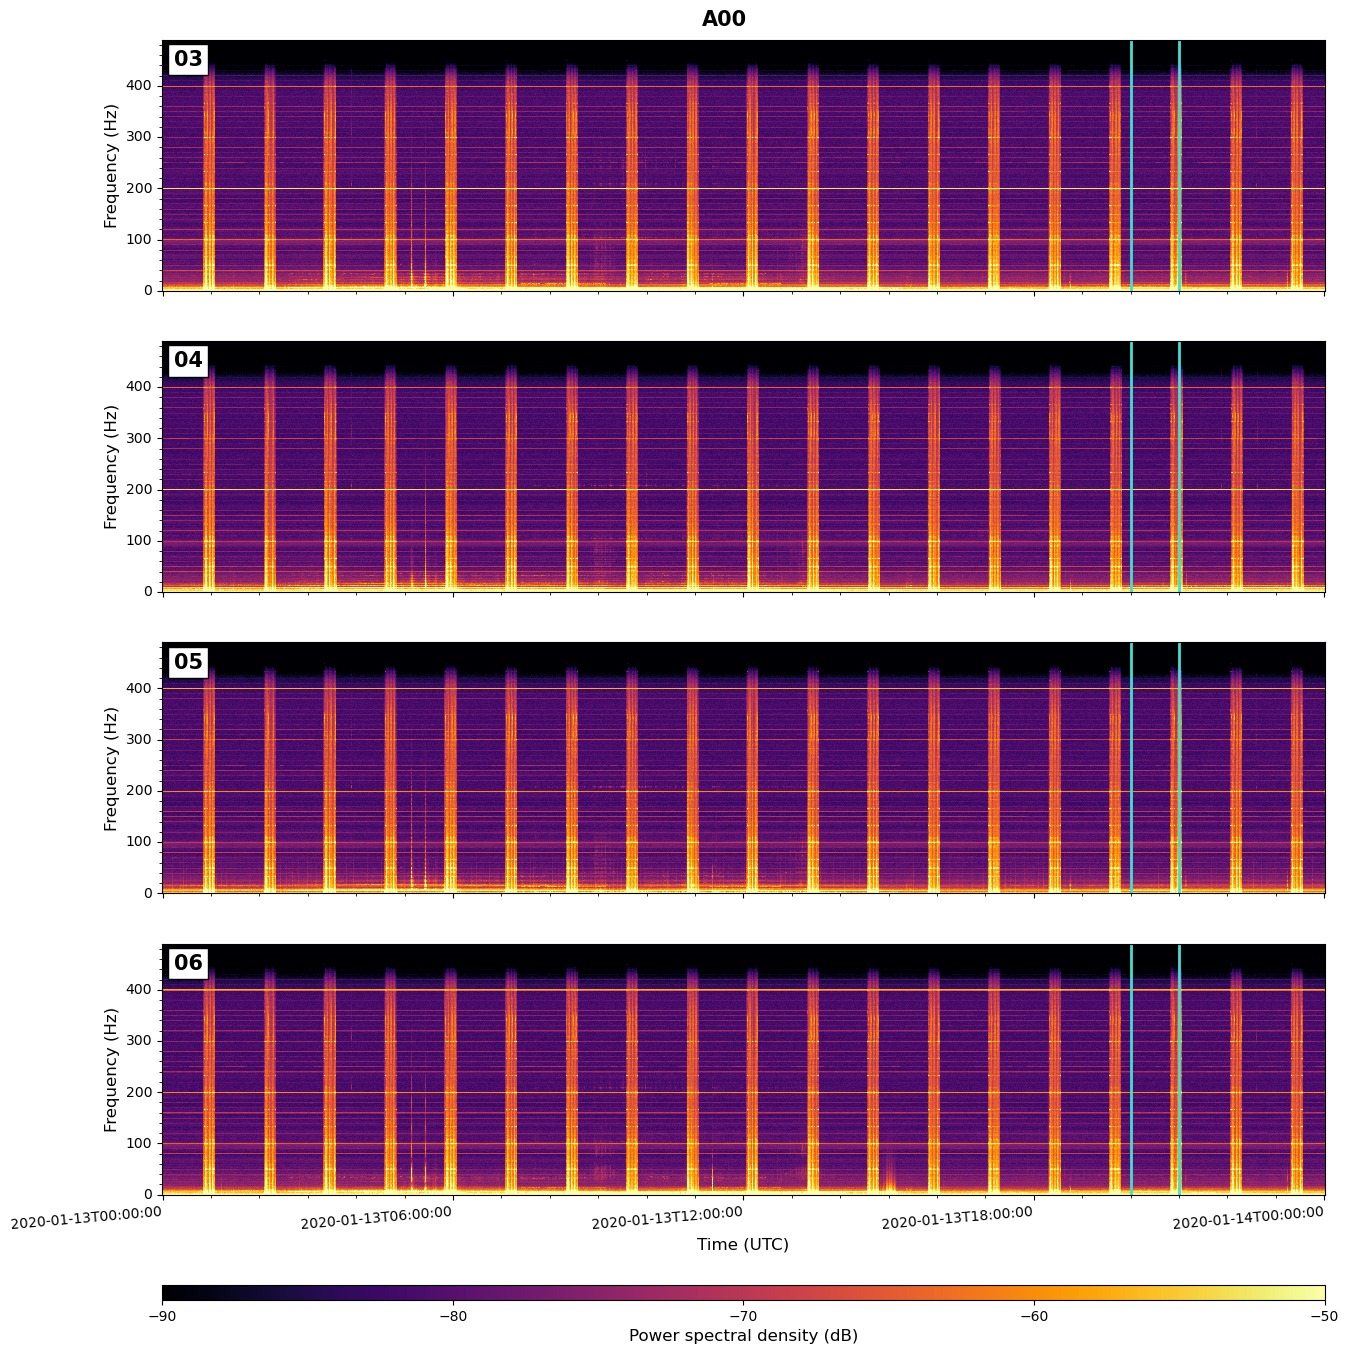

In [4]:
fig, axes, cbar = plot_long_term_hydro_stft_spectrograms(stream_spec, 
                                 dbmin = dbmin, dbmax = dbmax, 
                                 date_format = "%Y-%m-%dT%H:%M:%S", major_time_spacing = 6, minor_time_spacing = 1,
                                 time_tick_rotation = 5)
if marker:
    for ax in axes:
        ax.axvline(starttime_marker, color = "turquoise", linewidth = 2)
        ax.axvline(endtime_marker, color = "turquoise", linewidth = 2)

In [5]:
figname = f"daily_hydro_spectrograms_{day}_{station}_window{window_length:.0f}s_overlap{overlap:.1f}.png"
save_figure(fig, figname)

Figure saved to /fp/projects01/ec332/data/figures/daily_hydro_spectrograms_20200113_A00_window60s_overlap0.0.png
